In [2]:
import pandas as pd
import numpy as np
import json
from dictor import dictor
from tabulate import tabulate

In [34]:
# path_json = "../data/parsed_baseline_v3_dropout_0_25_E_10/results.json"
# rgb
# path_json = "/Users/julianvonklitzing/Documents/GitHub/end2endappras/Evaluation/results/longest6results/v3_rgb_dropout_0_25_E_10/e10_rgb.json"
# lidar
path_json = "/Users/julianvonklitzing/Documents/GitHub/end2endappras/Evaluation/results/longest6results/resnet_lidar_v1_dropout_ep17/results.json"

In [35]:
with open(path_json) as f:
    results = json.load(f)

In [36]:
progress = dictor(results, '_checkpoint.progress')

In [37]:
def prettify_json(path):
    with open(path) as fd:
        json_dict = json.load(fd)

    if not json_dict:
        print('[Error] The file [{}] could not be parsed.'.format(args.file))
        return -1

    progress = dictor(json_dict, '_checkpoint.progress')
    records_table = dictor(json_dict, '_checkpoint.records')
    sensors = dictor(json_dict, 'sensors')
    labels_scores = dictor(json_dict, 'labels')
    scores = dictor(json_dict, 'values')

    # compose output
    output = ""

    if progress:
        output += '* {}% ({}/{}) routes completed\n'.format(100.0*progress[0]/float(progress[1]),
                                                            progress[0],
                                                            progress[1])
    if sensors:
        output += '* The agent used the following sensors: {}\n\n'.format(', '.join(sensors))

    if scores and labels_scores:
        metrics = [labels_scores[0:3], scores[0:3]]
        infractions = [labels_scores[3:], scores[3:]]

    if records_table:
        header = ['route', 'metric', 'value', 'additional information']
        list_statistics = [header]
        total_duration_game = 0
        total_duration_system = 0
        total_route_length = 0
        for route in records_table:
            route_completed_kms = 0.01 * route['scores']['score_route'] * route['meta']['route_length'] / 1000.0
            metrics_route = [['{}'.format(route['route_id'])] + [key, '{:.3f}'.format(values), ''] for key, values in route['scores'].items()]
            infractions_route = [['{}'.format(route['route_id'])] + [key, '{:.3f} ({} occurrences)'.format(len(values)/route_completed_kms, len(values)),
                                 '\n'.join(values)] for key, values in route['infractions'].items()]

            times = [['{}'.format(route['route_id'])] + ['duration game', '{:.3f}'.format(route['meta']['duration_game']), 'seconds'],
                     ['{}'.format(route['route_id'])] + ['duration system', '{:.3f}'.format(route['meta']['duration_system']), 'seconds']]

            route_completed_length = [['{}'.format(route['route_id'])] + ['distance driven', '{:.3f}'.format(route_completed_kms), 'Km']]

            total_duration_game += route['meta']['duration_game']
            total_duration_system += route['meta']['duration_system']
            total_route_length += route_completed_kms

            list_statistics.extend([ *metrics_route, *infractions_route, *times, *route_completed_length])

        header = ['total duration_game [s]', 'total duration_system [s]', 'total distance driven [Km]']
        total_stats = [header]
        total_stats.append(['{:.3f}'.format(total_duration_game), '{:.3f}'.format(total_duration_system), '{:.3f}'.format(total_route_length)])

    df_metrics_avg = pd.DataFrame(metrics[1:], columns=metrics[0])
    df_infractions = pd.DataFrame(infractions[1:], columns=infractions[0])
    df_metrics_routes = pd.DataFrame(list_statistics[1:], columns=list_statistics[0])
    df_routes_tot_stats = pd.DataFrame(total_stats[1:], columns=total_stats[0])
    
    # return metrics, infractions, list_statistics, total_stats
    return df_metrics_avg, df_infractions, df_metrics_routes, df_routes_tot_stats


In [38]:
def prettify_json(path):
    with open(path) as fd:
        json_dict = json.load(fd)

    if not json_dict:
        print('[Error] The file [{}] could not be parsed.'.format(args.file))
        return -1

    progress = dictor(json_dict, '_checkpoint.progress')
    records_table = dictor(json_dict, '_checkpoint.records')
    sensors = dictor(json_dict, 'sensors')
    labels_scores = dictor(json_dict, 'labels')
    scores = dictor(json_dict, 'values')

    # compose output
    output = ""

    if progress:
        output += '* {}% ({}/{}) routes completed\n'.format(100.0*progress[0]/float(progress[1]),
                                                            progress[0],
                                                            progress[1])
    if sensors:
        output += '* The agent used the following sensors: {}\n\n'.format(', '.join(sensors))

    if scores and labels_scores:
        metrics = [labels_scores[0:3], scores[0:3]]
        infractions = [labels_scores[3:], scores[3:]]

    if records_table:
        header = ['route', 'metric', 'value', 'occurrences', 'additional information']
        list_statistics = [header]
        total_duration_game = 0
        total_duration_system = 0
        total_route_length = 0
        for route in records_table:
            route_completed_kms = 0.01 * route['scores']['score_route'] * route['meta']['route_length'] / 1000.0
            metrics_route = [['{}'.format(route['route_id'])] + [key, '{:.3f}'.format(values), np.NAN, ''] for key, values in route['scores'].items()]
            infractions_route = [['{}'.format(route['route_id'])] + [key, round(len(values)/route_completed_kms, 3), len(values),
                                 '\n'.join(values)] for key, values in route['infractions'].items()]

            times = [['{}'.format(route['route_id'])] + ['duration game', '{:.3f}'.format(route['meta']['duration_game']), np.NAN, 'seconds'],
                     ['{}'.format(route['route_id'])] + ['duration system', '{:.3f}'.format(route['meta']['duration_system']), np.NAN, 'seconds']]

            route_completed_length = [['{}'.format(route['route_id'])] + ['distance driven', '{:.3f}'.format(route_completed_kms), np.NAN, 'Km']]

            total_duration_game += route['meta']['duration_game']
            total_duration_system += route['meta']['duration_system']
            total_route_length += route_completed_kms

            list_statistics.extend([*metrics_route, *infractions_route, *times, *route_completed_length])

        header = ['total duration_game [s]', 'total duration_system [s]', 'total distance driven [Km]']
        total_stats = [header]
        total_stats.append(['{:.3f}'.format(total_duration_game), '{:.3f}'.format(total_duration_system), '{:.3f}'.format(total_route_length)])

    df_metrics_avg = pd.DataFrame(metrics[1:], columns=metrics[0]).astype("float32")
    df_infractions = pd.DataFrame(infractions[1:], columns=infractions[0]).astype("float32")
    df_metrics_routes = pd.DataFrame(list_statistics[1:], columns=list_statistics[0]).astype({"value": "float32", "occurrences": "float32"})
    df_routes_tot_stats = pd.DataFrame(total_stats[1:], columns=total_stats[0]).astype("float32")
    
    #return metrics, infractions, list_statistics, total_stats
    return df_metrics_avg, df_infractions, df_metrics_routes, df_routes_tot_stats

In [39]:
#metrics, infractions, list_statistics, total_stats = prettify_json(path_json)
df_metrics_avg, df_infractions, df_metrics_routes, df_routes_tot_stats = prettify_json(path_json)

In [40]:
df_metrics_avg.T

,0
Avg. driving score,13.365
Avg. route completion,33.597
Avg. infraction penalty,0.464


In [32]:
df_infractions.T

,0
Collisions with pedestrians,0.000
Collisions with vehicles,3.031
Collisions with layout,0.421
Red lights infractions,0.512
Stop sign infractions,0.162
Off-road infractions,0.855
Route deviations,0.389
Route timeouts,0.097
Agent blocked,0.943


In [46]:
df_metrics_routes[df_metrics_routes["metric"] == "collisions_vehicle"]["occurrences"].value_counts()

1.0     14
0.0     10
2.0      8
3.0      2
17.0     1
7.0      1
Name: occurrences, dtype: int64

In [63]:
df_metrics_routes[df_metrics_routes["metric"] ==  "collisions_vehicle"]["occurrences"].mean()

1.6666666

In [60]:
df_metrics_routes

,route,metric,value,occurrences,additional information
0,RouteScenario_0,score_composed,26.089001,NaN,
1,RouteScenario_0,score_penalty,0.360000,NaN,
2,RouteScenario_0,score_route,72.470001,NaN,
3,RouteScenario_0,collisions_layout,0.000000,0.0,
4,RouteScenario_0,collisions_pedestrian,0.000000,0.0,
...,...,...,...,...,...
535,RouteScenario_35,stop_infraction,0.000000,0.0,
536,RouteScenario_35,vehicle_blocked,0.000000,0.0,
537,RouteScenario_35,duration game,267.600006,NaN,seconds
538,RouteScenario_35,duration system,1290.834961,NaN,seconds


In [59]:
df_metrics_routes[df_metrics_routes["metric"] ==  "collisions_vehicle"]["occurrences"].value_counts()

1.0     14
0.0     10
2.0      8
3.0      2
17.0     1
7.0      1
Name: occurrences, dtype: int64

<AxesSubplot: ylabel='Frequency'>

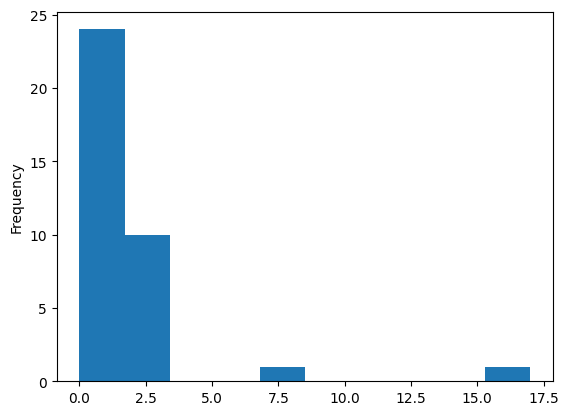

In [58]:
df_metrics_routes[df_metrics_routes["metric"] ==  "collisions_vehicle"]["occurrences"].plot.hist()  # .value_counts()

In [55]:
df_metrics_routes[df_metrics_routes["metric"] ==  "collisions_vehicle"]["occurrences"]

5       2.0
20      1.0
35      0.0
50      1.0
65      1.0
80      2.0
95      3.0
110     1.0
125     0.0
140     0.0
155     2.0
170     3.0
185     2.0
200     2.0
215     1.0
230     1.0
245     1.0
260     2.0
275    17.0
290     1.0
305     1.0
320     2.0
335     1.0
350     0.0
365     1.0
380     0.0
395     0.0
410     0.0
425     1.0
440     2.0
455     1.0
470     0.0
485     1.0
500     7.0
515     0.0
530     0.0
Name: occurrences, dtype: float32

<AxesSubplot: ylabel='Frequency'>

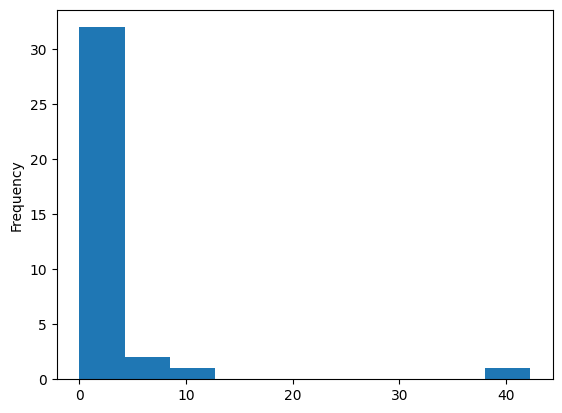

In [47]:
df_metrics_routes[df_metrics_routes.metric == "route_dev"]["value"].plot.hist()

<AxesSubplot: ylabel='Frequency'>

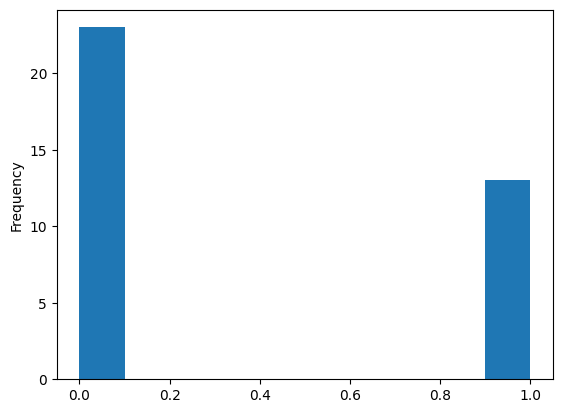

In [49]:
df_metrics_routes[df_metrics_routes.metric == "route_dev"]["occurrences"].plot.hist()

In [18]:
df_metrics_routes[~df_metrics_routes["occurrences"].isna()]["metric"].unique()

array(['collisions_layout', 'collisions_pedestrian', 'collisions_vehicle',
       'outside_route_lanes', 'red_light', 'route_dev', 'route_timeout',
       'stop_infraction', 'vehicle_blocked'], dtype=object)

<AxesSubplot: ylabel='Frequency'>

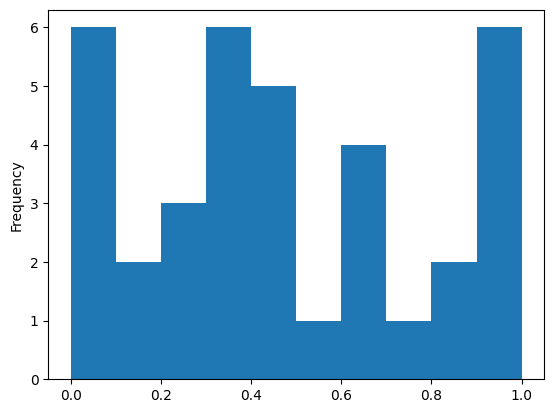

In [173]:
df_metrics_routes[df_metrics_routes.metric == "score_penalty"]["value"].astype("float32").plot.hist()